In [43]:
# Basic libs:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Libs for data preprocessing:

from bs4 import BeautifulSoup as soup
import html
import regex as re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samirkhonji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Cleaning

In order to analyse the tweets, and to increase the accuracy of the model, it is necessary to clean the data. Notably, the presence of stopwords also decreases the accuracy of my classifications; it is useful to remove these words to increase the proportion of words in the 'bag of words' that are insightful to training the model.
 
To clean the tweets in both datasets, I defined two functions: one function that satisfies the first four preprocessing requirements (removal of URLs, HTML tags and attributes and replacement of HTML character nodes with ASCII equivalents), and another function that removes stopwords. There is no reason why these could not have been combined into a single function, but I felt that having two functions enhanced my code's readability.

After defining these funcitons, I use panda's .apply() to apply them to the relevant columns of both data frames. This method is significantly simpler and faster than trying to iterrate/modify the DataFrames using a for loop.

In [44]:
with open('US_airline_tweets.csv', 'r', encoding='utf-8') as original_csv:
    df1 = pd.read_csv(original_csv)

In [45]:
with open("generic_tweets.txt") as generic_tweets_txt:
    df2 = pd.read_csv(generic_tweets_txt)

Let's take a look at a sample of the tweets:

In [46]:
df2.head(10)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [47]:
def clean_tweets(tweet):
    
    data = tweet.lower()      # Converts characters to lower case
    data = soup(data, "lxml") # Converts to soup object, so that get_text() can be applied
    data = data.get_text()    # Removes html tags
    data = re.sub(r"http\S+", "", data) # Removes all URLs
    data = html.unescape(data) # Replace html character codes
    data = data.translate(str.maketrans('','',string.punctuation)) # Removes punctuation
    data = re.sub(r'[^@a-z]', ' ', data) # removes all non-letters 
    
    return data

I am removing punctuation from the tweets before removing stopwords. As such, I first remove punctuation form the list of stopwords, so that all of the words match up with those in my tweets.

Looking for words in a list is slow; 'membership testing' is much faster using a set (unordered). I therefore convert the list of stopwords into a set, as you can see below.

In [48]:
word_list = open('stop_words.txt').read().split()

word_list_new = [w.translate(str.maketrans('','',string.punctuation)) for w in word_list] 
# New list containing words to without punctuation (since no punctuation in tweets)

In [49]:
stop_words = set(word_list_new) # Convert to set

In [50]:
def remove_stopwords(tweet):
    
    list_removed = [word for word in word_tokenize(tweet) if not word in stop_words] # Change back to stop_words
    combine = " "
    words_removed = combine.join(list_removed) # Join the items in the list, to return the tweet with no stop words
    
    return words_removed

In [51]:
df1['text'] = df1['text'].apply(clean_tweets).apply(remove_stopwords)

In [52]:
df2['text'] = df2['text'].apply(clean_tweets).apply(remove_stopwords)

Having applied both of my functions to each data frame, the tweets are now in a form that is amenable to analysis.

Let's look at the cleaned data frame for the generic tweets:

In [53]:
df2.head(10)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting cry result schoo...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived times ball managed save rest bo...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving mad
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,loltrish hey long time rains bit bit lol fine ...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,tatianak nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,twittera muera


# Exploratory Analysis

The function below can be applied to a single tweet. It iterrates through the 'airlines' list to see if the tweet contains any elements in the list. If it does contain an element in the list, the output of the function applied to the tweet is the element it contains. In other words, this function is able to determine what airline the tweet is about. Once again, I use pandas .apply() create a new column with all of the outputs.

One potential drawback to this method is that, if there is no match the any of the elements in the list, the output will be 'None'. For example, if the spelling of the airline name is different to that which is in the list, there will be no match. However, since most tweets tag the airline that they refer to (e.g. @united), the spelling should be the same because they are tagging the airline's twitter account.

In [54]:
def determine_airline(tweet): # This function determines the airline of the tweet by matching it to the following list
    
    airlines = ['united','usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica']
    
    for airline in airlines:
        if airline in tweet:
            airline_name = airline
            break
            
        else:
            airline_name = None # If there is no match to one of the airlines in the list above

    return(airline_name)

In [55]:
df1['airline'] = df1['text'].apply(determine_airline)

Looking at the data frame, there is now a new column ('airline') that identifies which airline the tweet is about.

In [56]:
df1.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx ear worm won,virginamerica


In [57]:
None in df1

False

The line above shows that every tweet in the dataset can be identified to one of the airlines in the list; there are no null values returned by my identificiation function. Let's go ahead and plot the number of tweets about each airline.

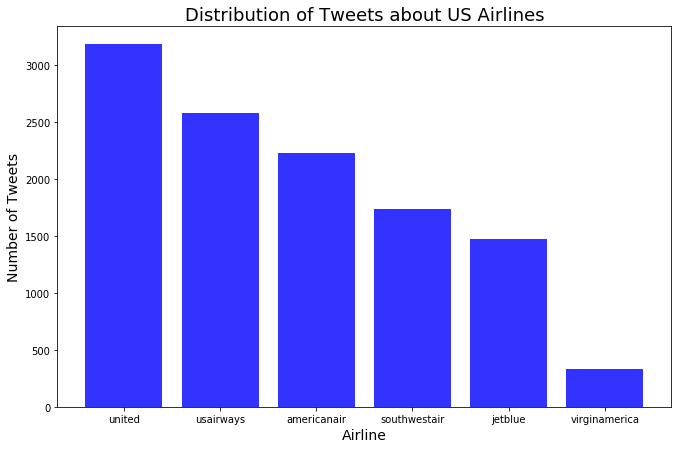

In [58]:
tweets_count  = df1['airline'].value_counts()
plt.figure(figsize=(11,7))
plt.bar(tweets_count.index, tweets_count.values, alpha=0.8, color = 'blue')
plt.title('Distribution of Tweets about US Airlines', fontsize = 18)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xlabel('Airline', fontsize=14)
plt.show()

The majority of the tweets are about United, while Virgin America has the lowest number of tweets by a sigiciant margin. 

Although the sentiments of each tweet have been provided, and could be visualized now, I'll save any plotting of sentiment for the airlines for my discussion section (after I have conducted my own sentiment analysis).

To visuliaze the content of the generic tweets, a word cloud is a suitable form of representation. In the word cloud below, the size of each word is proportional to the frequency of the word in the entire corpus of generic tweets. It therefore shows which words are most commonly in all of the tweets.

In [59]:
from wordcloud import WordCloud

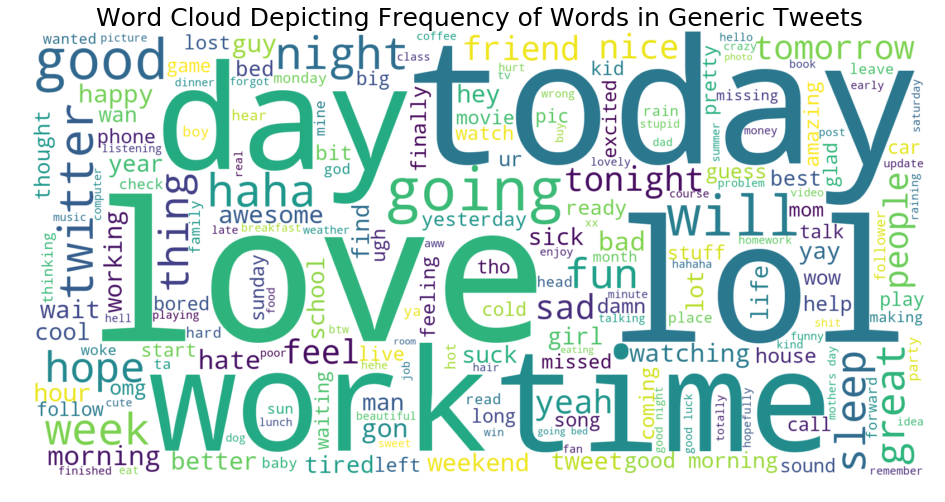

In [60]:
words = " ".join(tw for tw in df2.text) # combine all tweets from the column
wordcloud = WordCloud(width=1600, height=800,background_color="white").generate(words)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Depicting Frequency of Words in Generic Tweets", fontsize=25)
plt.axis("off")
plt.show()

#  Model Preparation

I use the frequency of each word in the column of clean tweets (corpus) as the features of the model. Since the prediction made by the model is the sentiment classification of a given tweet, this will be the target variable; it is a binary classification that is either 'positive' or 'negative'. As per convention, I denote the features with 'X' and the target variable as 'y' below. 

I use scikit-learn's TF-IDF count vectorizer to convert the tweets in to a numerical format that is suitable for feeding into the model. The TF-IDF vectorizer converts the corpus into a matrix of TF-IDF features. TF-IDF gives a score to each word, based on how significant that word is in the corpus. As such, words that appear more commonly across the corpus have their score penalised.

An advantage of using the TF-IDF method is that it is relatively simple to use, and easy to compute the similarity between different texts in the corpus.

A disadvantage of TF-IDF (and more generally the 'bag of words' model) is that it does not capture the relative position/order of words in each text. It also does not consider the semantic similarities between words.

In [61]:
X = np.array(df2['text'])

In [62]:
y = np.array(df2['class'])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6) # 70% training, 30% testing

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [65]:
X_train_cv = vect.fit_transform(X_train) # Convert features into sparse matrix (suitable for machine learning)

# Model Implementation – Part 1

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_cv,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

To check that the model is working, let's see how it performs on two made-up tweets (in a list below). The first tweet has a very obvious negative sentiment, while the second has a very obvious positive sentiment.

In [67]:
two_tweet_test = np.array(["hate kanye annoying stupid angry", "amazing fantastic fun best"])
two_tweet_predictions = model.predict(vect.transform(two_tweet_test))
two_tweet_predictions

array([0, 4])

I can see that my model predicted the first tweet a class of '0' (negative sentiment), and the second tweet a class of '4' (positive sentiment). Now that I know my model works on a small and easy-to-predict sample, let's see how it does on the testing data.

In [68]:
predictions = model.predict(vect.transform(X_test)) # NOT fit-transform, just transform

In [69]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predictions)

print (accuracy*100)

73.88333333333334


Now let's see how well the model makes predictions on the US airline tweets.

In [70]:
airline_test = np.array(df1['text'])

In [71]:
airline_predictions = model.predict(vect.transform(airline_test))

In [72]:
airline_predictions

array([0, 4, 0, ..., 0, 0, 0])

I need to convert 'positive' to '4' and 'negative' to '0' in order compare the US airline sentiments with the predictions made by my model:

In [73]:
sentiment_converted = np.array(df1['sentiment'].replace('negative', 0).replace('positive', 4))

In [74]:
sentiment_converted

array([4, 0, 0, ..., 4, 0, 0])

In [75]:
airline_accuracy = accuracy_score(sentiment_converted, airline_predictions)

print (airline_accuracy*100)

75.37475088813794


My model has approximately the same accuracy (actually sightly higher) on the US airline data. This may seem strange – I was expecting the model to be less accurate, since it was trained using the generic tweets data.

However, my model is slightly better at predicting the sentiment of negative tweets. The US airline data set has significantly more tweets with negative sentiment, and so this explains the surprisingly high accuracy.

# Model Implementation – Part 2: Multi-class Logistic Regression

In [76]:
df1_negative = df1[df1.sentiment == 'negative'] # DataFrame of negative airline tweets (using given sentiment labels)

In [77]:
df1_negative.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfopdx schedule mia,virginamerica
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,virginamerica


Firstly, let's see what the different negative reasons are:

In [78]:
df1_negative.negative_reason.unique()

array(['Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

Now I can train a new model to predict these reasons.

In [79]:
Xr = np.array(df1_negative['text']) # Lower case 'r' to denote 'reason'.

In [80]:
yr = np.array(df1_negative['negative_reason'])

In [81]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr,test_size=0.3, random_state=99)

In [82]:
Xr_train_cv = vect.fit_transform(Xr_train)

For multi-class logistic regression, I can define the model in the same way as before, but this time set the argument
multi_class = 'ovr' to specify the one-vs-rest scheme. This involves training a single classifier per class so that each class is evaluated as a binary classification relative to all of the other classes.

In [83]:
model_r = LogisticRegression(multi_class = 'ovr') # ovr: One-vs-rest scheme.
model_r.fit(Xr_train_cv, yr_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Once again, let's see how the model performs on two made-up tweets.

In [84]:
two_tweet_test_r = np.array(["united lost my luggage", "united delays my flight every time im always soooo late"])
two_tweet_predictions_r = model_r.predict(vect.transform(two_tweet_test_r))
two_tweet_predictions_r

array(['Lost Luggage', 'Late Flight'], dtype=object)

Again, the model seems to make the correct predictions when the tweets are very obvious. Now let's see how the model performs on the testing data.

In [85]:
predictions_r = model_r.predict(vect.transform(Xr_test))

In [86]:
accuracy_r = accuracy_score(yr_test,predictions_r)

print (accuracy_r*100)

60.53013798111837


As expected, the accuracy for multi-class predictions is significantly lower than for my other model (there are now several classes to predict instead of just two).

# Discussion

Using the predicitons made by my model, I can add a new column to the US airlines DataFrame that shows the sentiment predicted (see 'predictions' below). Since the predictions are given in terms of '0' and '4', I have converted them back to 'negative' and 'positive' respectively.

In [87]:
df1['prediction'] = pd.DataFrame(airline_predictions).replace(0, 'negative').replace(4, 'positive')

In [88]:
df1.head()

,id,sentiment,negative_reason,user,retweet_count,text,airline,prediction
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica commercials experience tacky,virginamerica,negative
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,virginamerica,positive
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,virginamerica,negative
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay flight seats playi...,virginamerica,negative
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx ear worm won,virginamerica,negative


I can now use a stacked bar plot to visualize the number of positive and negative sentiment tweets – based on my model's predictions – for each airline.

Text(0.5,1,'Predicted Sentiment of Tweets for each Airline')

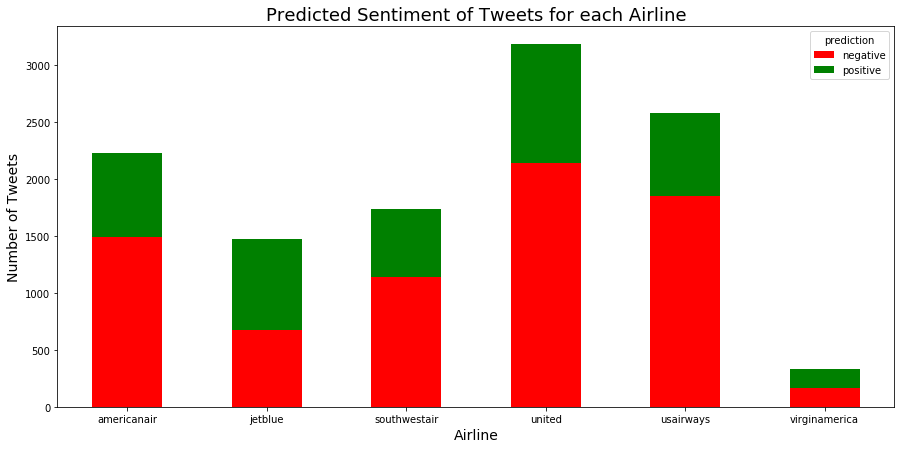

In [89]:
df1_sentiment = df1.groupby(['airline','prediction']).text.count()
airline_sentiment = df1_sentiment.unstack().plot(kind='bar',stacked=True, color=['red','green'], grid=False, figsize = (15,7), rot=0)
airline_sentiment.set_xlabel('Airline', fontsize = 14)
airline_sentiment.set_ylabel('Number of Tweets', fontsize = 14)
airline_sentiment.set_title('Predicted Sentiment of Tweets for each Airline', fontsize = 18)

The sentiment analysis conducted allows me to answer the research question: “What can public opinion on Twitter tell us about the US airlines in 2015?”. 

As can be seen from both figures above, the majority tweets about the US airlines have a negative sentiment. This is in line with my intuition; people are more likely to take to Twitter to complain if they feel that their experience has been negative, than they are to use Twitter as a means of praise when they have had a positive experience.

American Air, SouthWest Air, US Airways and United all have a particularly high proportion of tweets with a negative sentiment. This tells me that a lot of customers have used Twitter to make complaints, which is indicative of low customer satisfaction for these airlines. JetBlue and Virgin America have the highest proportion of tweets with a positive sentiment. However, it is important to note that my model incorrectly predicts that JetBlue has a majority of tweets with positive sentiment (the given sentiment values disprove this).

Let's have a look at the what my models predicts for the overall numbers of positive and negative Tweets across all of the airlines.

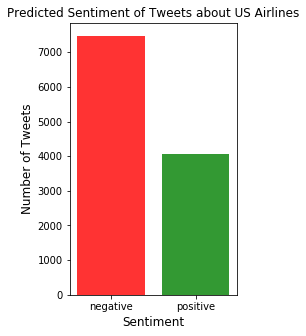

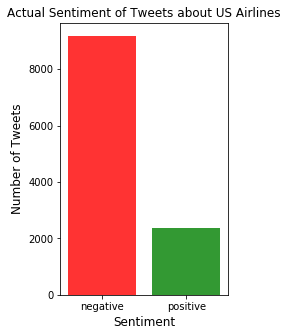

In [90]:
sentiment_count  = df1['prediction'].value_counts()
plt.figure(figsize=(3,5))
plt.bar(sentiment_count.index, sentiment_count.values, color = ['red', 'green'], alpha=0.8)
plt.title('Predicted Sentiment of Tweets about US Airlines')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)

actual_sentiment_count  = df1['sentiment'].value_counts()
plt.figure(figsize=(3,5))
plt.bar(actual_sentiment_count.index, actual_sentiment_count.values, color = ['red', 'green'], alpha=0.8)
plt.title('Actual Sentiment of Tweets about US Airlines')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)

plt.show()

There is some clear error in my model; it over-predicts the number of positive tweets in the data set. Looking at the actual (given) sentiment classifications of the tweets, there are significantly less positive tweets than my model predicts.

To learn more about this obeservation, let's look at the classification report and confusion matrix.

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Classification Report: \n',classification_report(sentiment_converted,airline_predictions))

print ('Confusion Matrix: \n',confusion_matrix(sentiment_converted,airline_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      9178
           4       0.44      0.76      0.56      2363

   micro avg       0.75      0.75      0.75     11541
   macro avg       0.68      0.76      0.69     11541
weighted avg       0.83      0.75      0.77     11541

Confusion Matrix: 
 [[6903 2275]
 [ 567 1796]]


Analysing the classification report and confusion matrix above, I can see that my model was much more accurate in predicting negative sentiment (0) than positive sentiment (4). It predicted a large number of false positives i.e. incorrectly predicting a positive sentiment.

One reason why my model has a higher accuracy with negative sentiment tweets is because there are significantly more negative sentiment tweets in the US airline data set. This increases the probability of correctly guessing a tweet with negative sentiment.

This is also why my model over-predicts the number of positive tweets in the US airline data set. It was trained using the Generic Tweets data set, which has an equal split of positive and negative sentiment tweets.

For the second (multi-classification) model, there are a number of reasons why my model failed to predict the correct negative reason. The distribution of reasons for the negative tweets is skewed (i.e. there are not equal numbers of each negative reason), which causes the one-vs-rest classifier approach to have a class imbalance. This means that my model has not had much training on certain classes, such as 'longlines' and 'Damaged Luggage', and therefore poorly predicts these classes.

Another reason is that the 'bag of words' model, using the frequency of words as features, does not consider the ordering of the words, meaning it does not reflect the context that the word is used in. The ordering of each word matters, and not considering it makes my model more likely to confuse classes that often consist of the same words. For example, tweets with the reasons 'Late Flight', 'Bad Flight' often contain the word 'flight', and without considering ordering/context of this word, it makes it hard to distinguish between these two classes.

Some ways to improve the accuracy of __both__ models include:

* Increasing the size of training data
* Adding more features to the model, or using different features (e.g. the use of _word embedding_ would be more accurate than merely the frequency of words). 
* The use of cross-validation
* Hyperparameter tuning - optimizing the regularization parameter.

For the multi-class logistic rgeression model, another way to improve accuracy would be to reduce the number of classes by grouping certain class together such as 'Customer Service Issue' and 'Flight Attendant Complaints' (since both issues to do with the airline's staff and service), and 'Lost Luggage' and 'Damaged luggage' (both issues are caused by the negligent handling of luggage).

In [92]:
df1_reasons = pd.DataFrame(predictions_r) # This dataframe was used for the above discussion.
df1_reasons.columns = ['prediction']
df1_reasons['actual_reason'] = pd.DataFrame(yr_test)

In [93]:
df1_reasons['actual_reason'].value_counts() # Can see class imbalance for negative reasons

Customer Service Issue         862
Late Flight                    511
Can't Tell                     370
Cancelled Flight               251
Lost Luggage                   216
Bad Flight                     184
Flight Booking Problems        154
Flight Attendant Complaints    130
longlines                       53
Damaged Luggage                 23
Name: actual_reason, dtype: int64

## Hyperparameter Tuning

Let's use scikit-learn's get_params() method to see the parameters (and hyperparameters) for my model.

In [94]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

I will attempt to improve the accuracy of my model by tuning the parameter C (shown above), which in scikit-learn is the inverse of regularization strength.

i.e. C = 1/λ where λ is the L2 regularization parameter. 

A useful algorithm for hyperparameter tuning is grid search. It is a brute-force search through the specified C paramters defined below.

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(model, param_grid)

In [97]:
grid.fit(X_train_cv,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The results of the grid search can viewed in a data frame:

In [98]:
results = pd.DataFrame(grid.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

In [99]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.281060,0.013775,0.006611,0.000348,0.001,{'C': 0.001},0.698909,0.700666,0.701410,0.700329,0.001048,5,0.714378,0.717303,0.718506,0.716729,0.001733
1,0.334516,0.009583,0.007152,0.000175,0.01,{'C': 0.01},0.704545,0.704224,0.706703,0.705157,0.001101,4,0.719124,0.720956,0.720702,0.720261,0.000810
2,0.486659,0.004626,0.006264,0.000094,0.1,{'C': 0.1},0.723102,0.721152,0.724167,0.722807,0.001249,2,0.752306,0.755296,0.754623,0.754075,0.001280
3,0.965581,0.037203,0.006482,0.000203,1,{'C': 1},0.734973,0.730045,0.735546,0.733521,0.002469,1,0.830360,0.831678,0.831862,0.831300,0.000669
4,2.040539,0.017699,0.007346,0.000960,10,{'C': 10},0.724752,0.718945,0.723396,0.722364,0.002480,3,0.926789,0.929018,0.929383,0.928396,0.001146
5,3.890516,0.099014,0.007110,0.001107,100,{'C': 100},0.699252,0.695309,0.699181,0.697914,0.001842,6,0.949857,0.952300,0.952397,0.951518,0.001175
6,8.988796,0.269795,0.006547,0.000154,1000,{'C': 1000},0.669445,0.668224,0.670295,0.669321,0.000850,7,0.954432,0.956757,0.957132,0.956107,0.001194


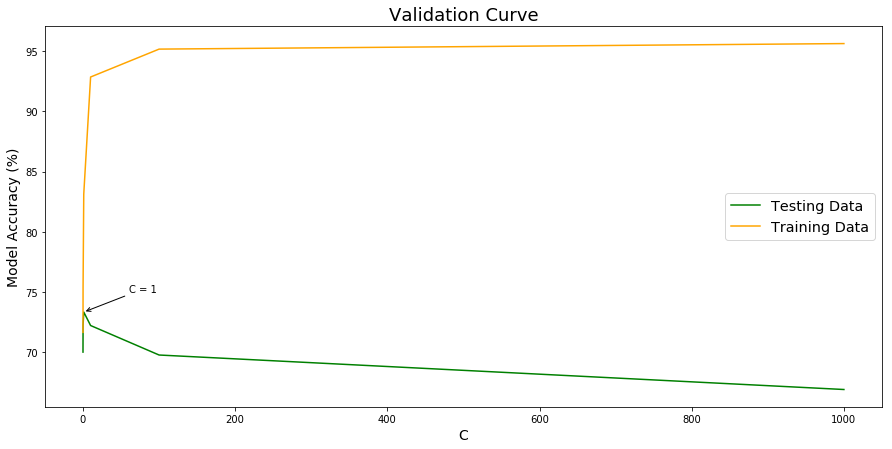

In [100]:
plt.figure(figsize = (15,7))
plt.plot(results.param_C, 100*results.mean_test_score, color='g', label = 'Testing Data')
plt.plot(results.param_C, 100*results.mean_train_score, color='orange', label = 'Training Data')
plt.legend(loc='center right', fontsize = 'x-large')
plt.xlabel('C', fontsize = 14)
plt.ylabel('Model Accuracy (%)', fontsize = 14)
plt.title('Validation Curve', fontsize = 18)
plt.annotate('C = 1', xy = (1, max(100*results.mean_test_score)),xytext = (60,75),arrowprops=dict(arrowstyle="->"))
plt.show()

In [101]:
print('Highest Accuracy (%): ', 100*grid.best_score_)
print('Optimal C Parameter:', grid.best_estimator_.get_params()['C'])

Highest Accuracy (%):  73.35214285714285
Optimal C Parameter: 1


The value of C in my model was already 1; it should be kept as it is.